<a href="https://colab.research.google.com/github/taaixsp/nattyornot/blob/main/NattyOrNotProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import os

# Download stock data
stock_data = yf.download('AAPL', start='2024-01-01', end='2025-01-01')

# Create the directory if it doesn't exist
os.makedirs('data/raw', exist_ok=True)

# Save the data to CSV
stock_data.to_csv('data/raw/aapl_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(stock_data.head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700
2024-01-03  183.150391  184.770668  182.335277  183.120571  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500


In [ ]:
import yfinance as yf
import os

# Download stock data
stock_data = yf.download('AAPL', start='2024-01-01', end='2025-01-01')

# Create the directory if it doesn't exist
os.makedirs('data/raw', exist_ok=True)

# Save the data to CSV
stock_data.to_csv('data/raw/aapl_stock_data.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
import os

file_path = 'data/raw/aapl_stock_data.csv'

if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"File not found at: {file_path}")
    print(f"Current working directory: {os.getcwd()}")

File found at: data/raw/aapl_stock_data.csv


In [ ]:
import numpy as np
import pandas as pd
import os # Import the os module

def generate_synthetic_data(length=1000):
    np.random.seed(42)
    steps = np.random.normal(loc=0, scale=1, size=length)
    prices = np.cumsum(steps) + 100  # Starting price around $100
    dates = pd.date_range(start='2024-01-01', periods=length)
    return pd.DataFrame({'date': dates, 'price': prices})

# Create the directory if it doesn't exist
os.makedirs('data/raw', exist_ok=True) # This line creates the directory

synthetic_data = generate_synthetic_data()
synthetic_data.to_csv('data/raw/synthetic_stock_data.csv', index=False)

In [ ]:
import pandas as pd

def feature_engineering(df):
    df['return'] = df['price'].pct_change()
    df['rolling_mean'] = df['price'].rolling(window=5).mean()
    df['rolling_std'] = df['price'].rolling(window=5).std()
    df['volatility'] = df['return'].rolling(window=5).std()
    df['momentum'] = df['price'] / df['price'].shift(5) - 1
    df.dropna(inplace=True)
    return df


In [ ]:
print(synthetic_data.head())

        date       price
0 2024-01-01  100.496714
1 2024-01-02  100.358450
2 2024-01-03  101.006138
3 2024-01-04  102.529168
4 2024-01-05  102.295015


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load real data from the saved CSV file
real_data = pd.read_csv('data/raw/aapl_stock_data.csv', index_col=0)

# Combine real and synthetic data
real_data['label'] = 1
synthetic_data['label'] = 0

combined = pd.concat([real_data, synthetic_data]).sample(frac=1)


In [ ]:
print(combined.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'label', 'date', 'price'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Combine real and synthetic data
real_data['label'] = 1
synthetic_data['label'] = 0

combined = pd.concat([real_data, synthetic_data]).sample(frac=1)
X = combined.drop(columns=['label', 'date'])
y = combined['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.dtypes)  # See data types
print(X.head())  # See sample values

Close      object
High       object
Low        object
Open       object
Volume     object
price     float64
dtype: object
    Close High  Low Open Volume       price
312   NaN  NaN  NaN  NaN    NaN  101.137856
175   NaN  NaN  NaN  NaN    NaN   92.092520
46    NaN  NaN  NaN  NaN    NaN   89.088604
534   NaN  NaN  NaN  NaN    NaN   92.706698
359   NaN  NaN  NaN  NaN    NaN  100.595256


In [ ]:
# Convert object columns to numeric, coercing errors to NaN
X = combined.drop(columns=['label', 'date'], errors='ignore')
X = X.apply(pd.to_numeric, errors='coerce')  # Turns non-numeric data into NaN

# Check for NaN values
print(X.isna().sum())  # See how many missing values each column has

# Fill NaNs with 0 or use a different strategy if needed
X.fillna(0, inplace=True)  # Or use X.fillna(X.mean()) if you prefer the mean


Close     1002
High      1002
Low       1002
Open      1002
Volume    1002
price      254
dtype: int64


In [ ]:
X.fillna(method='ffill', inplace=True)

<ipython-input-35-ab58aef7ff54>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Combine real and synthetic data
real_data['label'] = 1
synthetic_data['label'] = 0

combined = pd.concat([real_data, synthetic_data]).sample(frac=1)

# Drop non-numeric columns
X = combined.drop(columns=['label', 'date'], errors='ignore')

# Convert object columns to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Forward fill missing values
X.fillna(method='ffill', inplace=True)

# Ensure no remaining NaNs after forward fill (optional check)
print(X.isna().sum().sum())  # Should print 0 if all NaNs were filled

# Target variable
y = combined['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


<ipython-input-37-93ce82aa0254>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


5
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       200
           1       0.00      0.00      0.00        51

    accuracy                           0.71       251
   macro avg       0.39      0.45      0.41       251
weighted avg       0.62      0.71      0.66       251



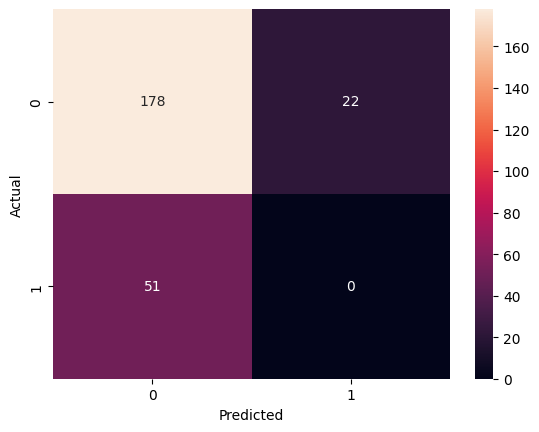

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(y.value_counts())  # Check the balance of labels

label
0    1000
1     254
Name: count, dtype: int64


In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               class_weight='balanced')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Combine real and synthetic data
real_data['label'] = 1
synthetic_data['label'] = 0

combined = pd.concat([real_data, synthetic_data]).sample(frac=1)

# Prepare features and target
X = combined.drop(columns=['label', 'date'], errors='ignore')

# Convert object columns to numeric, coercing errors to NaN and forward fill
X = X.apply(pd.to_numeric, errors='coerce').fillna(method='ffill')

y = combined['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with class weighting
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               class_weight='balanced')  # <== Here’s the magic
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


<ipython-input-42-a658f4f33b67>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.apply(pd.to_numeric, errors='coerce').fillna(method='ffill')


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       205
           1       0.07      0.04      0.05        46

    accuracy                           0.72       251
   macro avg       0.44      0.46      0.44       251
weighted avg       0.67      0.72      0.69       251



In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               class_weight={0: 1, 1: 10})  # Increase weight for class 1
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       205
           1       0.07      0.04      0.05        46

    accuracy                           0.72       251
   macro avg       0.44      0.46      0.45       251
weighted avg       0.67      0.72      0.69       251



In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare your data (ensure X_train, X_test, y_train, y_test are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model with class weight handling
model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=10,  # Increase weight for the minority class (class 1)
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.76      0.78       205
           1       0.17      0.22      0.19        46

    accuracy                           0.66       251
   macro avg       0.49      0.49      0.49       251
weighted avg       0.69      0.66      0.67       251



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [10, 20, 50]
}

grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid, cv=3, scoring='f1', verbose=1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 10}
              precision    recall  f1-score   support

           0       0.92      0.05      0.10       205
           1       0.19      0.98      0.32        46

    accuracy                           0.22       251
   macro avg       0.55      0.52      0.21       251
weighted avg       0.78      0.22      0.14       251



In [ ]:
model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=5,  # Reduce weight for class 1
    eval_metric='logloss'
)


In [ ]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.3).astype(int)  # Adjust threshold to 0.3 or other values
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.18      1.00      0.31        46

    accuracy                           0.18       251
   macro avg       0.09      0.50      0.15       251
weighted avg       0.03      0.18      0.06       251



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=2,  # Reduce the weight for class 1 further
    eval_metric='logloss'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       205
           1       0.16      0.15      0.16        46

    accuracy                           0.70       251
   macro avg       0.49      0.49      0.49       251
weighted avg       0.69      0.70      0.70       251



In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.2).astype(int)  # Try lowering the threshold to 0.2 or adjusting it

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       205
           1       0.17      0.35      0.23        46

    accuracy                           0.57       251
   macro avg       0.49      0.48      0.47       251
weighted avg       0.69      0.57      0.61       251



In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [1, 2, 3, 5]
}

grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid, cv=3, scoring='f1', verbose=1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       205
           1       0.22      0.41      0.29        46

    accuracy                           0.62       251
   macro avg       0.53      0.54      0.51       251
weighted avg       0.72      0.62      0.66       251



In [ ]:
# Drop rows with missing values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Keep the corresponding labels

# 1. Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_clean)

# 2. Standardization (scaling the numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-test split for scaled features (use the same for testing)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_train_clean, test_size=0.2, random_state=42)

# 3. Train XGBoost model with class balancing
model = xgb.XGBClassifier(
    n_estimators=100,              # Number of trees
    max_depth=3,                   # Depth of trees
    scale_pos_weight=5,            # Adjust for class imbalance
    random_state=42,
    use_label_encoder=False,       # To avoid warnings
    eval_metric='logloss'          # Evaluation metric
)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.72      0.72       151
           1       0.14      0.14      0.14        49

    accuracy                           0.58       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.58      0.58      0.58       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
X['log_return'] = np.log(X['Close'] / X['Close'].shift(1))

In [ ]:
# 50-day Simple Moving Average (SMA)
X['SMA_50'] = X['Close'].rolling(window=50).mean()

# Exponential Moving Average (EMA)
X['EMA_50'] = X['Close'].ewm(span=50, adjust=False).mean()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       151
           1       0.14      0.14      0.14        49

    accuracy                           0.58       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.58      0.58      0.58       200



In [ ]:
model = xgb.XGBClassifier(scale_pos_weight=200)  # or try experimenting with different values

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1003, 6)
(797,)


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure that X and y are properly defined before splitting
X = combined.drop(columns=['label', 'date'], errors='ignore')
y = combined['label']

# Split the data correctly (features and labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes again
print(X_train.shape)  # Should be (1003, 6)
print(y_train.shape)  # Should be (1003,)

(1003, 6)
(1003,)


In [ ]:
import pandas as pd

# Convert all columns to numeric, coercing errors (invalid data) into NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for missing values and fill them (or drop rows with NaN values)
X_train.fillna(X_train.mean(), inplace=True)  # Impute missing values with the column mean
X_test.fillna(X_test.mean(), inplace=True)

# Verify the conversion and check for NaN values
print(X_train.dtypes)
print(X_train.isnull().sum())  # Ensure there are no missing values


Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
price     float64
dtype: object
Close     0
High      0
Low       0
Open      0
Volume    0
price     0
dtype: int64


In [ ]:
# Define model and parameter grid
model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 2, 5, 10]
}

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 10}
Best score: 0.999001996007984


In [ ]:
# Using the best parameters to train the final model
best_model = grid_search.best_estimator_

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       205
           1       0.00      0.00      0.00        46

    accuracy                           0.81       251
   macro avg       0.41      0.50      0.45       251
weighted avg       0.67      0.81      0.73       251

Confusion Matrix:
 [[204   1]
 [ 46   0]]


In [ ]:
model = XGBClassifier(scale_pos_weight=10)

In [ ]:
scale_pos_weight = len(y_train) / (2 * sum(y_train == 1))

In [ ]:
# Calculate the number of samples in each class
num_negative_class = sum(y_train == 0)
num_positive_class = sum(y_train == 1)

# Calculate scale_pos_weight
scale_pos_weight = num_negative_class / num_positive_class
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 3.8221153846153846


In [ ]:
from xgboost import XGBClassifier

# Define the XGBoost model with scale_pos_weight
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.18      0.98      0.30        46

    accuracy                           0.18       251
   macro avg       0.09      0.49      0.15       251
weighted avg       0.03      0.18      0.06       251

Confusion Matrix:
[[  0 205]
 [  1  45]]


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"New class distribution: {y_train_resampled.value_counts()}")

New class distribution: label
0    795
1    795
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model and parameter grid
model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 2, 5, 10]  # Tune scale_pos_weight to help with class imbalance
}

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}
Best score: 0.9987421383647798


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.18      1.00      0.31        46

    accuracy                           0.18       251
   macro avg       0.09      0.50      0.15       251
weighted avg       0.03      0.18      0.06       251

Confusion Matrix:
[[  0 205]
 [  0  46]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


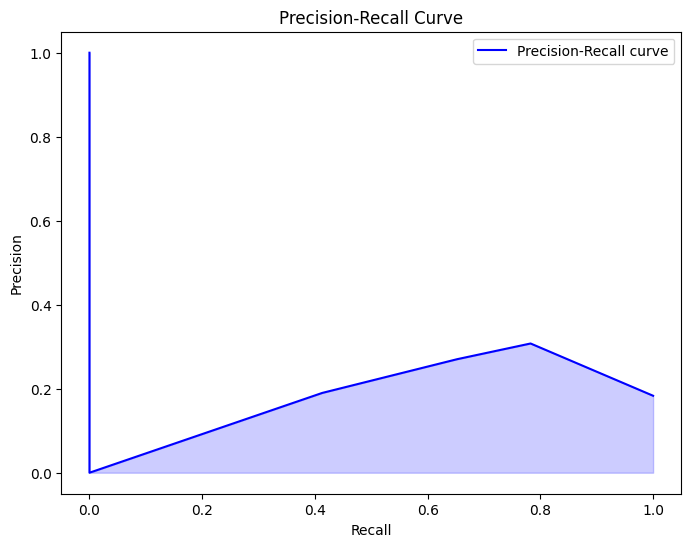

Precision-Recall AUC: 0.19


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get the prediction probabilities for class 1
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.fill_between(recall, precision, color='blue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Calculate AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Fit the model to the undersampled data
grid_search.fit(X_train_under, y_train_under)

# Print the best parameters and best score after undersampling
print("Best parameters after undersampling:", grid_search.best_params_)
print("Best score after undersampling:", grid_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters after undersampling: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
Best score after undersampling: 0.9928057553956835


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       205
           1       0.00      0.00      0.00        46

    accuracy                           0.81       251
   macro avg       0.41      0.50      0.45       251
weighted avg       0.67      0.81      0.73       251

Confusion Matrix:
[[204   1]
 [ 46   0]]


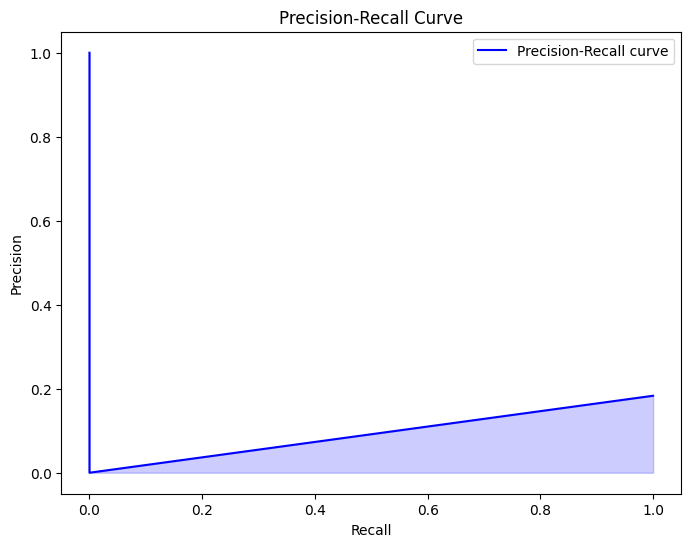

Precision-Recall AUC: 0.09


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get the prediction probabilities for class 1 (positive class)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.fill_between(recall, precision, color='blue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Calculate AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit the model with the resampled dataset
model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=5)
model.fit(X_train_res, y_train_res)

# Predict and evaluate the model
y_pred_res = model.predict(X_test)
print(classification_report(y_test, y_pred_res))
print(confusion_matrix(y_test, y_pred_res))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       205
           1       0.00      0.00      0.00        46

    accuracy                           0.81       251
   macro avg       0.41      0.50      0.45       251
weighted avg       0.67      0.81      0.73       251

[[204   1]
 [ 46   0]]


In [ ]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Set a lower threshold for class 1 (e.g., 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the new predictions
print(classification_report(y_test, y_pred_adjusted))
print(confusion_matrix(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       205
           1       0.00      0.00      0.00        46

    accuracy                           0.81       251
   macro avg       0.41      0.50      0.45       251
weighted avg       0.67      0.81      0.73       251

[[204   1]
 [ 46   0]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the model
model = XGBClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 2, 5, 10]  # Adjust to address class imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and best score
print("Best parameters after SMOTE and undersampling:", grid_search.best_params_)
print("Best score after SMOTE and undersampling:", grid_search.best_score_)

# Evaluate the final model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters after SMOTE and undersampling: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}
Best score after SMOTE and undersampling: 0.9987421383647798
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.18      1.00      0.31        46

    accuracy                           0.18       251
   macro avg       0.09      0.50      0.15       251
weighted avg       0.03      0.18      0.06       251

Confusion Matrix:
[[  0 205]
 [  0  46]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
